In [2]:
import numpy as np
import pandas as pd
import time

In [4]:
df = pd.read_csv(r'C:\Users\sinha\OneDrive\CODING\PYTHON\TENSORFLOW\csv\Social_Network_Ads (1).csv')

In [5]:
df.head( )

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df = df[['Age','EstimatedSalary','Purchased']]

In [7]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled.shape

(400, 2)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
X_train.shape

(320, 2)

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\sinha\anaconda3\envs\ENV1\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()

'''IF WE WRITE BATCH SIZE=1 THEN IT IS ------> Stochastics Gradient Descent

IF WE WRITE BATCH SIZE=NO OF ROW IN YOUR DATA  THEN IT IS ------> Batch Gradient Descent Gradient Descent

'''



history = model.fit(X_scaled,y,epochs=200,batch_size=1,validation_split=0.2)
print(time.time() - start)

Epoch 1/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7156 - loss: 0.5764 - val_accuracy: 0.6375 - val_loss: 0.6876
Epoch 2/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.3642 - val_accuracy: 0.6875 - val_loss: 0.6051
Epoch 3/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8469 - loss: 0.3140 - val_accuracy: 0.6750 - val_loss: 0.5264
Epoch 4/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8500 - loss: 0.3008 - val_accuracy: 0.7000 - val_loss: 0.4729
Epoch 5/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8562 - loss: 0.2962 - val_accuracy: 0.7250 - val_loss: 0.4441
Epoch 6/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8562 - loss: 0.2975 - val_accuracy: 0.7625 - val_loss: 0.4098
Epoch 7/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8594 - loss: 0.2892 - val_accuracy: 0.8000 - val_loss: 0.3772
Epoch 8/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8719 - loss: 0.2818 - val_accu

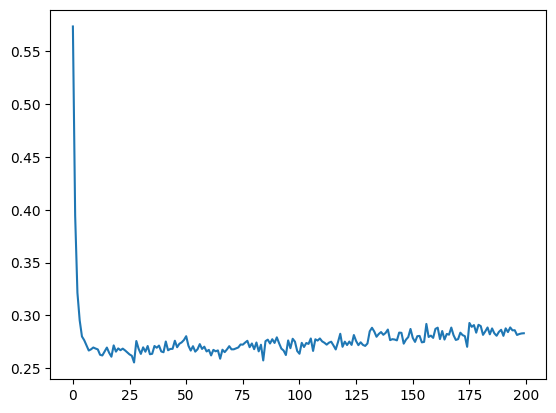

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [36]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [37]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=400,validation_split=0.2)
print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step - accuracy: 0.2469 - loss: 0.7409 - val_accuracy: 0.4500 - val_loss: 0.6806
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.2469 - loss: 0.7319 - val_accuracy: 0.4500 - val_loss: 0.6800
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.2594 - loss: 0.7259 - val_accuracy: 0.5000 - val_loss: 0.6793
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.2594 - loss: 0.7212 - val_accuracy: 0.5500 - val_loss: 0.6787
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.2906 - loss: 0.7172 - val_accuracy: 0.5750 - val_loss: 0.6782
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3500 - loss: 0.7136 - val_accuracy: 0.5875 - val_loss: 0.6776
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3906 - loss: 0.7103 - val_accuracy: 0.6125 - val_loss: 0.6769
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4375 - loss: 0.7072 - val_accuracy: 0.6375 - val_loss: 0.6762

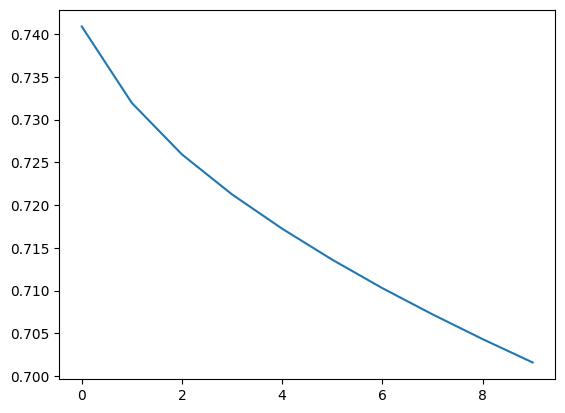

In [38]:
plt.plot(history.history['loss'])